# data cleaning and preprocessing

In [6]:
import pandas as pd
import numpy as np


In [3]:
df=pd.read_csv("/home/rgukt/codsoft/advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [16]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# Data Analysis

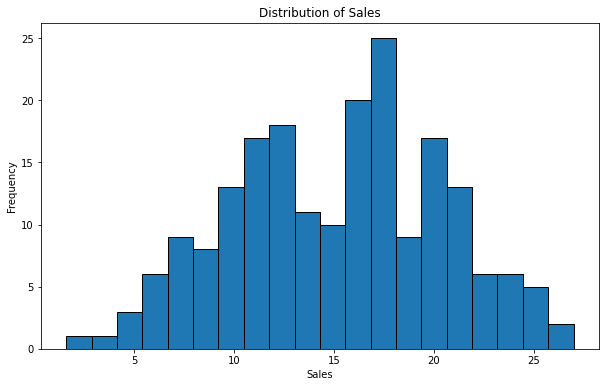

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.hist(df['Sales'], bins=20, edgecolor='k')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


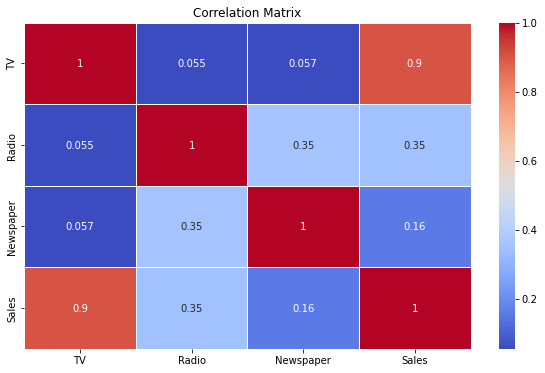

In [18]:
corr_matrix = df.corr()
print(corr_matrix)
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

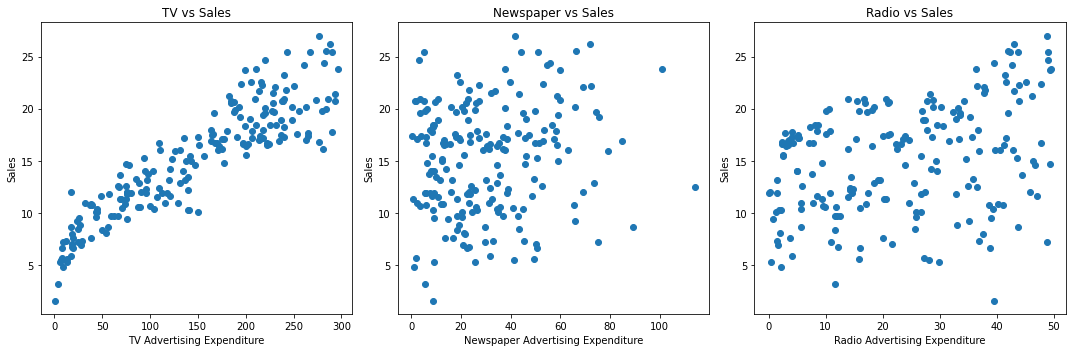

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV Advertising Expenditure')
plt.ylabel('Sales')
plt.title('TV vs Sales')
plt.subplot(1, 3, 2)
plt.scatter(df['Newspaper'], df['Sales'])
plt.xlabel('Newspaper Advertising Expenditure')
plt.ylabel('Sales')
plt.title('Newspaper vs Sales')
plt.subplot(1, 3, 3)
plt.scatter(df['Radio'], df['Sales'])
plt.xlabel('Radio Advertising Expenditure')
plt.ylabel('Sales')
plt.title('Radio vs Sales')
plt.tight_layout()
plt.show()


# building model and evaluation

In [21]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [22]:
from sklearn.model_selection import train_test_split
input_data=df[['TV', 'Radio', 'Newspaper']]
output=df['Sales']
x=input_data.values
y=output.values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)

(150, 3)
(50, 3)


In [23]:
#Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print(y_pred)

[17.04041233 20.39964377 23.74740099  9.25653209 21.67525948 12.56179334
 21.07865662  8.70895483 17.28353601 16.68491851  8.92573172  8.50762572
 18.2530284   8.06003145 12.68447869 14.96677492  8.12198913 17.91906169
 11.01929198 20.4979062  20.81737524 12.58662099 10.88870324 22.39692163
  9.44183427  7.95532725 20.83706013 13.83997207 10.79282849  7.92309626
 16.00432589 10.64496918 20.79094843 10.40916722 21.61788525 21.1954234
 12.10497731 22.82970275 12.63229447  6.49245031 11.94463925 15.3638056
  9.91037996  9.48003396 17.28192106  7.25660905 10.36937236 15.25293577
 11.17116856 11.72114226]


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 1.1199940713361771
Mean Squared Error: 2.4040674447118895
Root Mean Squared Error: 1.5505055448826648
R-squared: 0.9115647723992757


In [25]:
#Gradient Boostion Regressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Squared Error: 1.549958263300002


In [26]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)


1.5562135800000023


In [27]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)

4.070399999999999
